# Coding Exercise

SLSTR Brightness Temperature Analysis

## Short overview 
This notebook loads geolocated SLSTR brightness‑temperature data, inspects basic structure and value ranges, and visualizes all thermal bands spatially. It then examines statistical relationships through histograms and a correlation matrix, derives a simple cloud mask, and computes key spectral differences.


## Import required libraries and load SLSTR data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data from URL
url = "http://carppond.iup.uni-bremen.de:8000/f/487f9479b42f4f1693fe/?dl=1"
df = pd.read_pickle(url)

## Inspect data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1295348 entries, 202530 to 1799983
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   latitude   1295348 non-null  float32       
 1   longitude  1295348 non-null  float32       
 2   S7_BT      1295348 non-null  float32       
 3   S8_BT      1295348 non-null  float32       
 4   S9_BT      1295348 non-null  float32       
 5   F2_BT      1295348 non-null  float32       
 6   time       1295348 non-null  datetime64[ns]
 7   F1_BT      1295348 non-null  float32       
dtypes: datetime64[ns](1), float32(7)
memory usage: 54.4 MB


In [3]:
df.head()

,latitude,longitude,S7_BT,S8_BT,S9_BT,F2_BT,time,F1_BT
202530,66.111168,119.633102,261.920013,242.169998,239.729996,242.509995,2018-07-04 14:09:49,259.329987
202531,66.111168,119.633102,261.920013,242.169998,239.729996,242.509995,2018-07-04 14:09:49,261.220001
202533,66.110565,119.585159,264.649994,246.600006,243.309998,247.029999,2018-07-04 14:09:49,266.220001
204030,66.111168,119.633102,261.920013,242.169998,239.729996,242.509995,2018-07-04 14:09:50,259.329987
204031,66.111168,119.633102,261.920013,242.169998,239.729996,242.509995,2018-07-04 14:09:50,262.350006


In [4]:
df.tail()

,latitude,longitude,S7_BT,S8_BT,S9_BT,F2_BT,time,F1_BT
1799979,70.218163,76.848885,285.679993,273.089996,271.609985,273.179993,2018-07-04 14:11:09,285.640015
1799980,70.216515,76.820641,285.339996,272.089996,270.579987,271.940002,2018-07-04 14:11:09,284.970001
1799981,70.204704,76.807777,286.570007,274.220001,272.769989,274.410004,2018-07-04 14:11:09,287.079987
1799982,70.207932,76.787392,286.500000,273.250000,271.739990,273.279999,2018-07-04 14:11:09,287.079987
1799983,70.196190,76.774864,286.690002,275.420013,273.869995,275.579987,2018-07-04 14:11:09,287.079987


In [5]:
# summarize brightness temperature ranges per band

bands = ["S7_BT", "S8_BT", "S9_BT", "F1_BT", "F2_BT"]
df[bands].agg(["min", "max"])

,S7_BT,S8_BT,S9_BT,F1_BT,F2_BT
min,229.960007,225.789993,225.440002,200.559998,226.369995
max,305.040009,290.059998,288.359985,309.250000,290.059998


## Visualize data

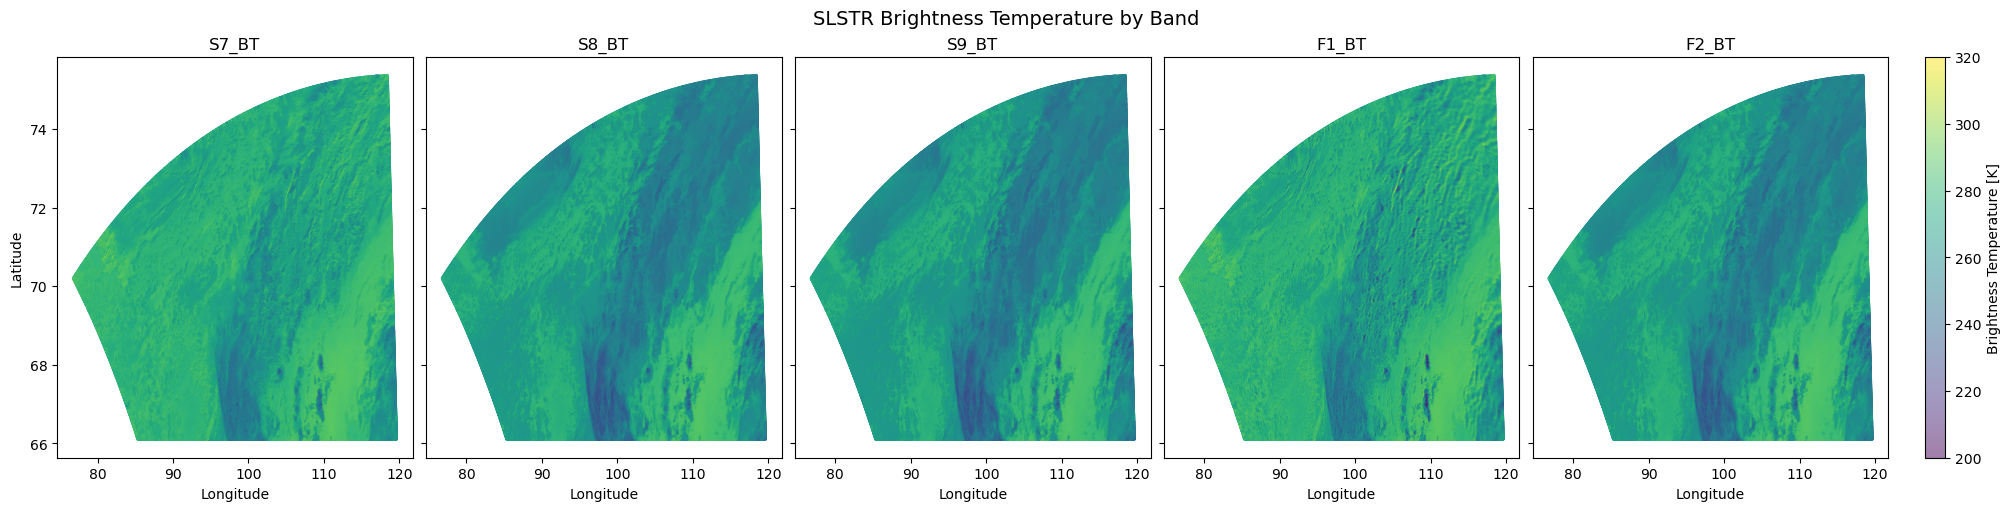

In [6]:
# plot slstr data (this may take a moment)

bands = ["S7_BT", "S8_BT", "S9_BT", "F1_BT", "F2_BT"]

# create subplots with shared axes
fig, axes = plt.subplots(
    1, len(bands),
    figsize=(20, 5),
    sharex=True,
    sharey=True,
    constrained_layout=True
)

# scatter-plot brightness temperature for each band
for ax, band in zip(axes, bands):
    sc = ax.scatter(
        df["longitude"],
        df["latitude"],
        c=df[band],
        s=1,
        cmap="viridis",
        alpha=0.5,
        vmin=200,
        vmax=320
    )
    ax.set_title(band)
    ax.set_xlabel("Longitude")

# label latitude on the first subplot only
axes[0].set_ylabel("Latitude")

# add a single shared colorbar for all subplots
cbar = fig.colorbar(
    sc,
    ax=axes,
    orientation="vertical",
    fraction=0.02,
    pad=0.02
)
cbar.set_label("Brightness Temperature [K]")

# add overall figure title
fig.suptitle("SLSTR Brightness Temperature by Band", fontsize=14)
plt.show()

## Correlation matrix

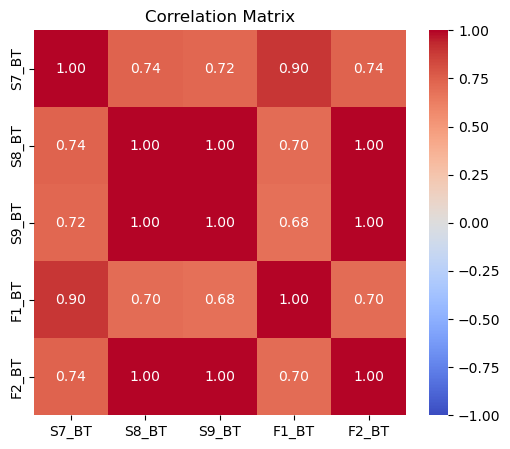

In [7]:
# compute correlation matrix for brightness temperature bands

bands = ["S7_BT", "S8_BT", "S9_BT", "F1_BT", "F2_BT"]

corr = df[bands].corr(method="pearson")

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)
plt.title("Correlation Matrix")
plt.show()

## Histograms

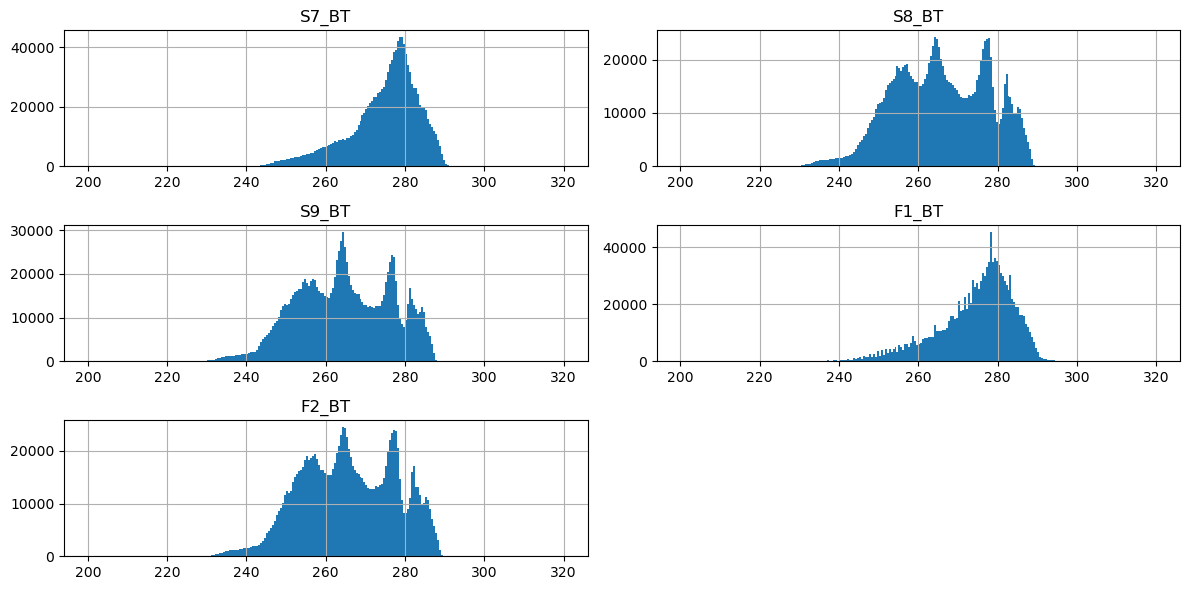

In [ ]:
# show brightness temperature histograms

df[['S7_BT','S8_BT','S9_BT','F1_BT','F2_BT']].hist(bins=240, range=(200, 320), figsize=(12,6))
plt.tight_layout()
plt.show()

## Simple cloud mask

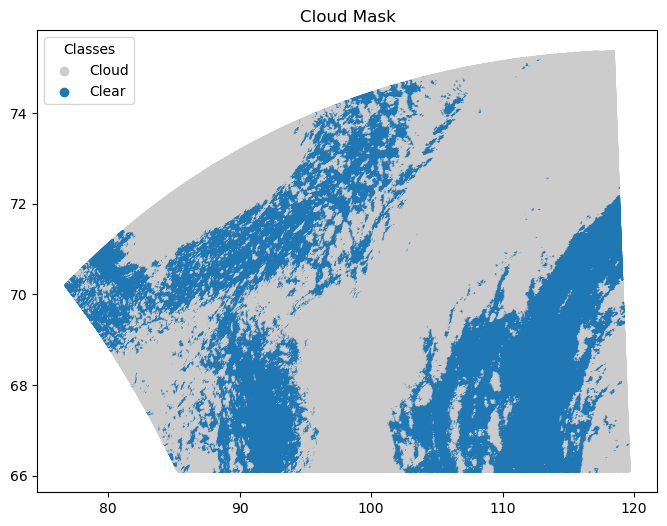

In [ ]:
# simple cloud mask (gray = cloud, blue = clear)

cloud_mask = df["S8_BT"] < 270
colors = {True: "#cccccc", False: "#1f77b4"}
c = cloud_mask.map(colors)

plt.figure(figsize=(8,6))
plt.scatter(df.longitude, df.latitude, c=c, s=1)
plt.title("Cloud Mask")

# add legend using dummy scatter handles
plt.scatter([], [], c="#cccccc", label="Cloud")
plt.scatter([], [], c="#1f77b4", label="Clear")
plt.legend(title="Classes")
plt.show()

## Spectral differences

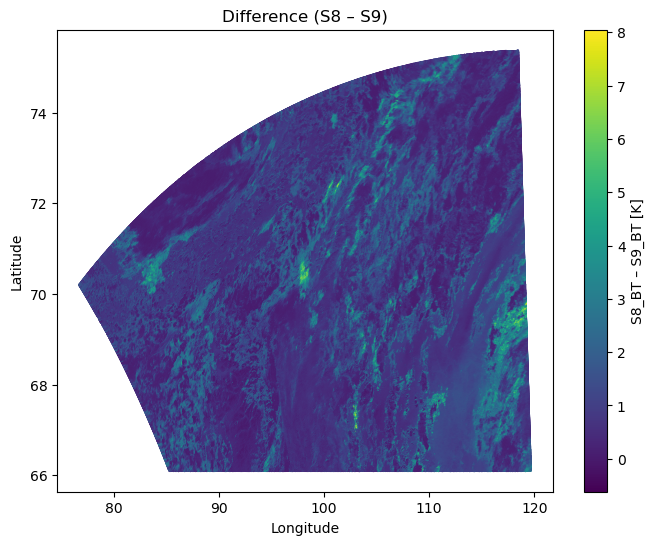

In [10]:
# spectral differences of S8 and S9

df["S8_S9_diff"] = df["S8_BT"] - df["S9_BT"]

plt.figure(figsize=(8,6))
plt.scatter(
    df.longitude,
    df.latitude,
    c=df["S8_S9_diff"],
    s=1,
    cmap="viridis"
)
plt.colorbar(label="S8_BT – S9_BT [K]")
plt.title("Difference (S8 – S9)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

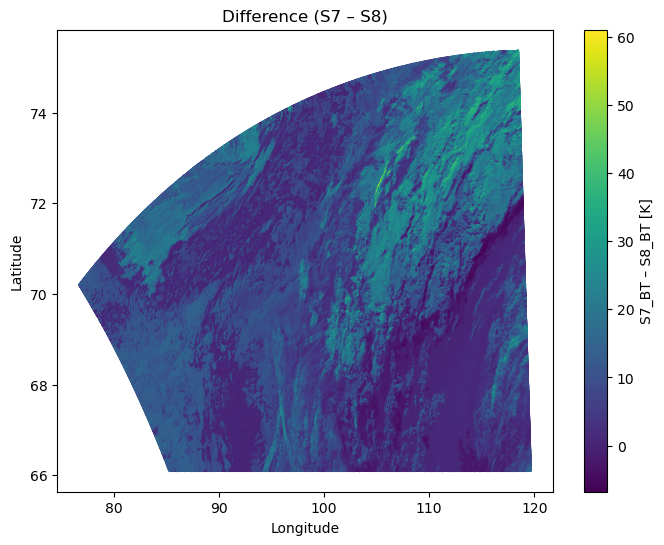

In [11]:
# spectral differences of S7 and S8

df["S7_S8_diff"] = df["S7_BT"] - df["S8_BT"]

plt.figure(figsize=(8,6))
plt.scatter(
    df.longitude,
    df.latitude,
    c=df["S7_S8_diff"],
    s=1,
    cmap="viridis"
)
plt.colorbar(label="S7_BT – S8_BT [K]")
plt.title("Difference (S7 – S8)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

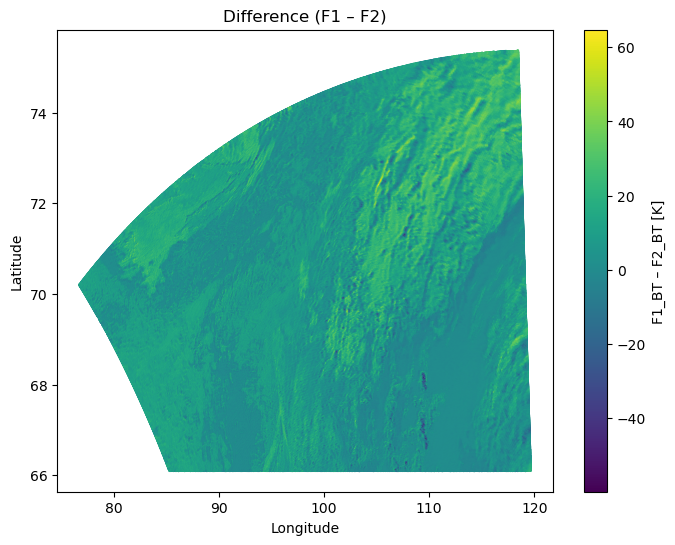

In [12]:
# spectral differences of F1 and F2

df["F1_F2_diff"] = df["F1_BT"] - df["F2_BT"]

plt.figure(figsize=(8,6))
plt.scatter(
    df.longitude,
    df.latitude,
    c=df["F1_F2_diff"],
    s=1,
    cmap="viridis"
)
plt.colorbar(label="F1_BT – F2_BT [K]")
plt.title("Difference (F1 – F2)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()